In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

C:\Users\vinic\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\vinic\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('VC Pd_C (Etanol).txt' , sep =';')
VPd = data['Potential'].values
IPd = data['Current'].values

data = pd.read_csv('VC Pt_C (Etanol).txt' , sep =';')
VPt = data['Potential'].values
IPt = data['Current'].values

**Pt/C**

$E_pico$ = -0.13 V $i_pico$ = 5.1 mA
$E_0$ = -0.62 V


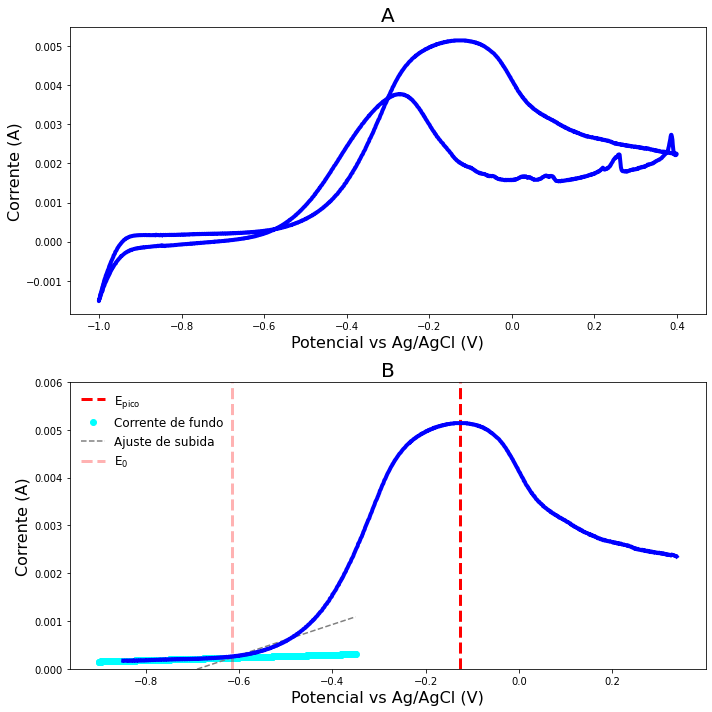

In [8]:
fig,axs = plt.subplots(2,1 , figsize = (10,10) )

axs[0].plot(VPt,IPt , color = 'blue',lw = 4)
axs[0].set_ylabel('Corrente (A)' , fontsize = 16)
axs[0].set_xlabel('Potencial vs Ag/AgCl (V)' , fontsize = 16)
axs[0].set_title('A' , fontsize = 20)
#------------------------------------------------------------------
#Definir região de interesse
idx = 200
Van,Ian = VPt[:len(VPt)//2-idx], IPt[:len(IPt)//2-idx]
#Achar valor de pico
peaks,_ = find_peaks(Ian,height=0.0035)
axs[1].axvline(x = Van[peaks][0]  ,color = 'red',linestyle ='--',lw = 3 , label = '$\\text{E}_{\\text{pico}}$')
print(f'$E_pico$ = {Van[peaks][0]:.2f} V' , f'$i_pico$ = {Ian[peaks][0]*1000:.1f} mA')
#Definir potencial baseline
V0 = -0.7
masc = Van <V0
Base_coeff = np.polyfit(Van[masc], Ian[masc], 1)
I_base = np.poly1d(Base_coeff)

Vf = -0.9
Vi = -0.35
vs = np.linspace(Vf,Vi,1000)

axs[1].plot(vs,I_base(vs),'o',lw = 3,color='cyan',label='Corrente de fundo')
#Fazer fit para subida do pico
V0 = -0.65
Vf = -0.45
masc_sub = (Van>V0)*(Van<Vf)

Sub_coeefs = np.polyfit(Van[masc_sub], Ian[masc_sub], 1)
I_sub = np.poly1d(Sub_coeefs)

axs[1].plot(vs,I_sub(vs),'--',color='gray',label='Ajuste de subida')
#Achar potencial de inicio
E0s = np.roots(I_base-I_sub)
print(f'$E_0$ = {E0s[0]:.2f} V')
axs[1].axvline(x = E0s[0]  ,color = 'red',alpha=0.3,linestyle ='--',lw = 3 , label = '$\\text{E}_{0}$')


axs[1].plot(Van,Ian , color = 'blue',lw = 4)
axs[1].set_ylabel('Corrente (A)' , fontsize = 16)
axs[1].set_xlabel('Potencial vs Ag/AgCl (V)' , fontsize = 16)
axs[1].set_ylim(0,0.006)
axs[1].set_title('B' , fontsize = 20)
axs[1].legend(loc = 'upper left',frameon = False,fontsize = 12)


plt.tight_layout()
plt.savefig('Pt_C-Vcs.png',dpi=300,transparent=True)

**Pd/C**

$E_pico$ = -0.10 V $i_pico$ = 5.6 mA
$E_0$ = -0.71 V


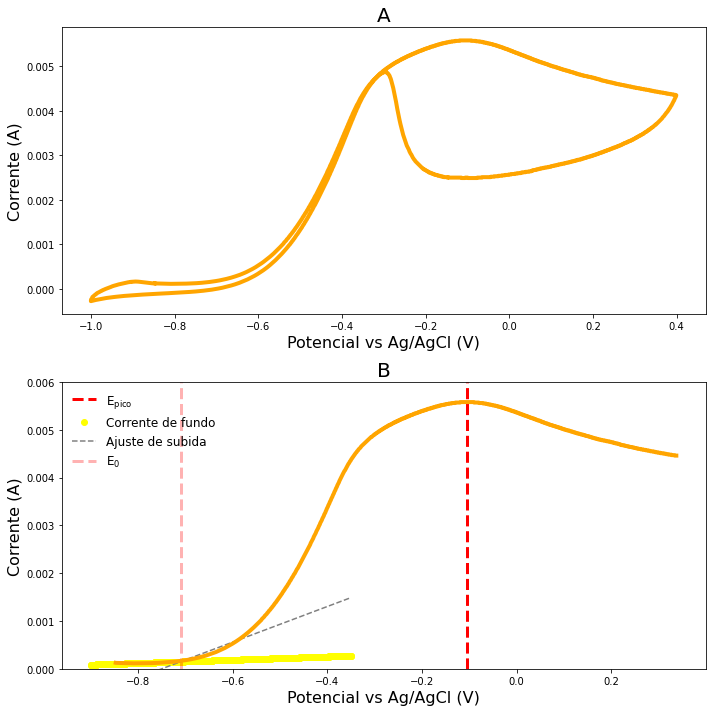

In [9]:
fig,axs = plt.subplots(2,1 , figsize = (10,10) )

axs[0].plot(VPd,IPd , color = 'orange',lw = 4)
axs[0].set_ylabel('Corrente (A)' , fontsize = 16)
axs[0].set_xlabel('Potencial vs Ag/AgCl (V)' , fontsize = 16)
axs[0].set_title('A' , fontsize = 20)
#------------------------------------------------------------------
#Definir região de interesse
idx = 200
Van,Ian = VPd[:len(VPd)//2-idx], IPd[:len(IPd)//2-idx]
#Achar valor de pico
peaks,_ = find_peaks(Ian,height=0.0035)
axs[1].axvline(x = Van[peaks][0]  ,color = 'red',linestyle ='--',lw = 3 , label = '$\\text{E}_{\\text{pico}}$')
print(f'$E_pico$ = {Van[peaks][0]:.2f} V' , f'$i_pico$ = {Ian[peaks][0]*1000:.1f} mA')
#Definir potencial baseline
V0 = -0.7
masc = Van <V0
Base_coeff = np.polyfit(Van[masc], Ian[masc], 1)
I_base = np.poly1d(Base_coeff)

Vf = -0.9
Vi = -0.35
vs = np.linspace(Vf,Vi,1000)

axs[1].plot(vs,I_base(vs),'o',lw = 3,color='yellow',label='Corrente de fundo')
#Fazer fit para subida do pico
V0 = -0.75
Vf = -0.55
masc_sub = (Van>V0)*(Van<Vf)

Sub_coeefs = np.polyfit(Van[masc_sub], Ian[masc_sub], 1)
I_sub = np.poly1d(Sub_coeefs)

axs[1].plot(vs,I_sub(vs),'--',color='gray',label='Ajuste de subida')
#Achar potencial de inicio
E0s = np.roots(I_base-I_sub)
print(f'$E_0$ = {E0s[0]:.2f} V')
axs[1].axvline(x = E0s[0]  ,color = 'red',alpha=0.3,linestyle ='--',lw = 3 , label = '$\\text{E}_{0}$')


axs[1].plot(Van,Ian , color = 'orange',lw = 4)
axs[1].set_ylabel('Corrente (A)' , fontsize = 16)
axs[1].set_xlabel('Potencial vs Ag/AgCl (V)' , fontsize = 16)
axs[1].set_ylim(0,0.006)
axs[1].set_title('B' , fontsize = 20)
axs[1].legend(loc = 'upper left',frameon = False,fontsize = 12)


plt.tight_layout()
plt.savefig('Pd_C-Vcs.png',dpi=300,transparent=True)